In [1]:
import pandas as pd
import matplotlib.pyplot as plt


path = '/content/drive/MyDrive/For Python/shopping_trends_updated.csv'
df = pd.read_csv(path)
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [ ]:
!pip install pdf2image -q
!apt-get install poppler-utils -q

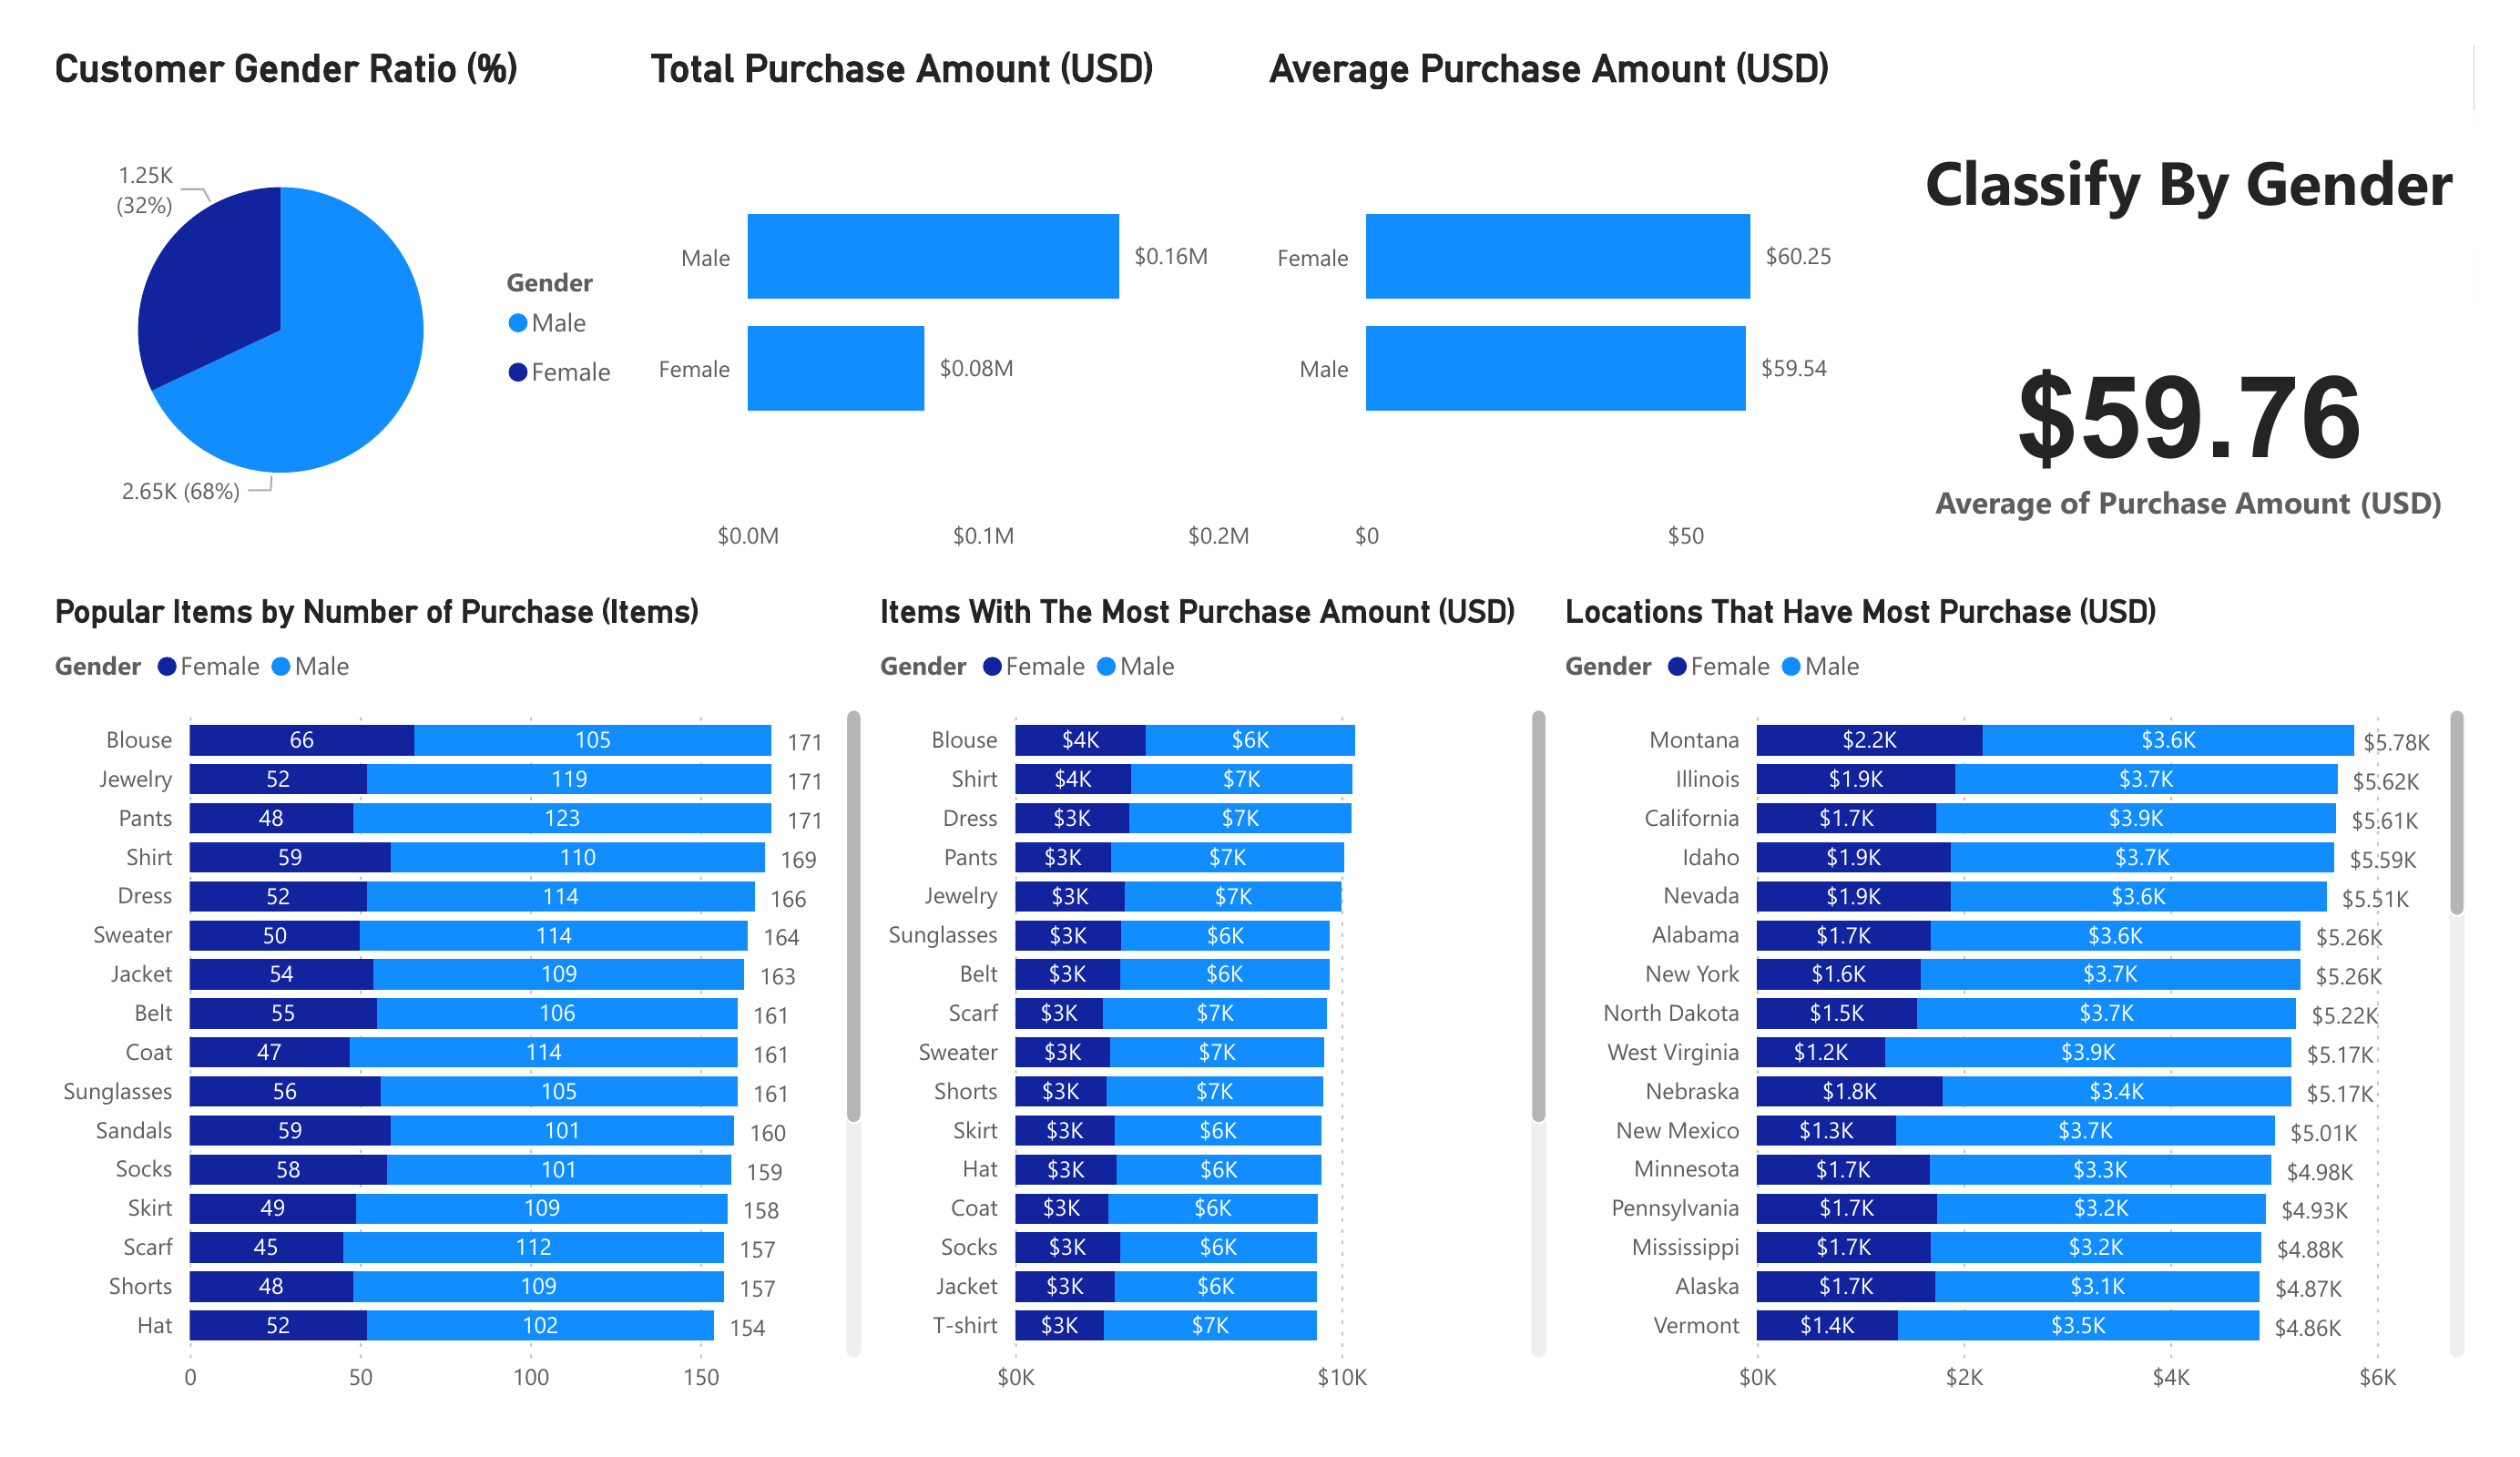

In [10]:
from pdf2image import convert_from_path

images = convert_from_path("/content/drive/MyDrive/For Python/Dash.pdf")
images[0]

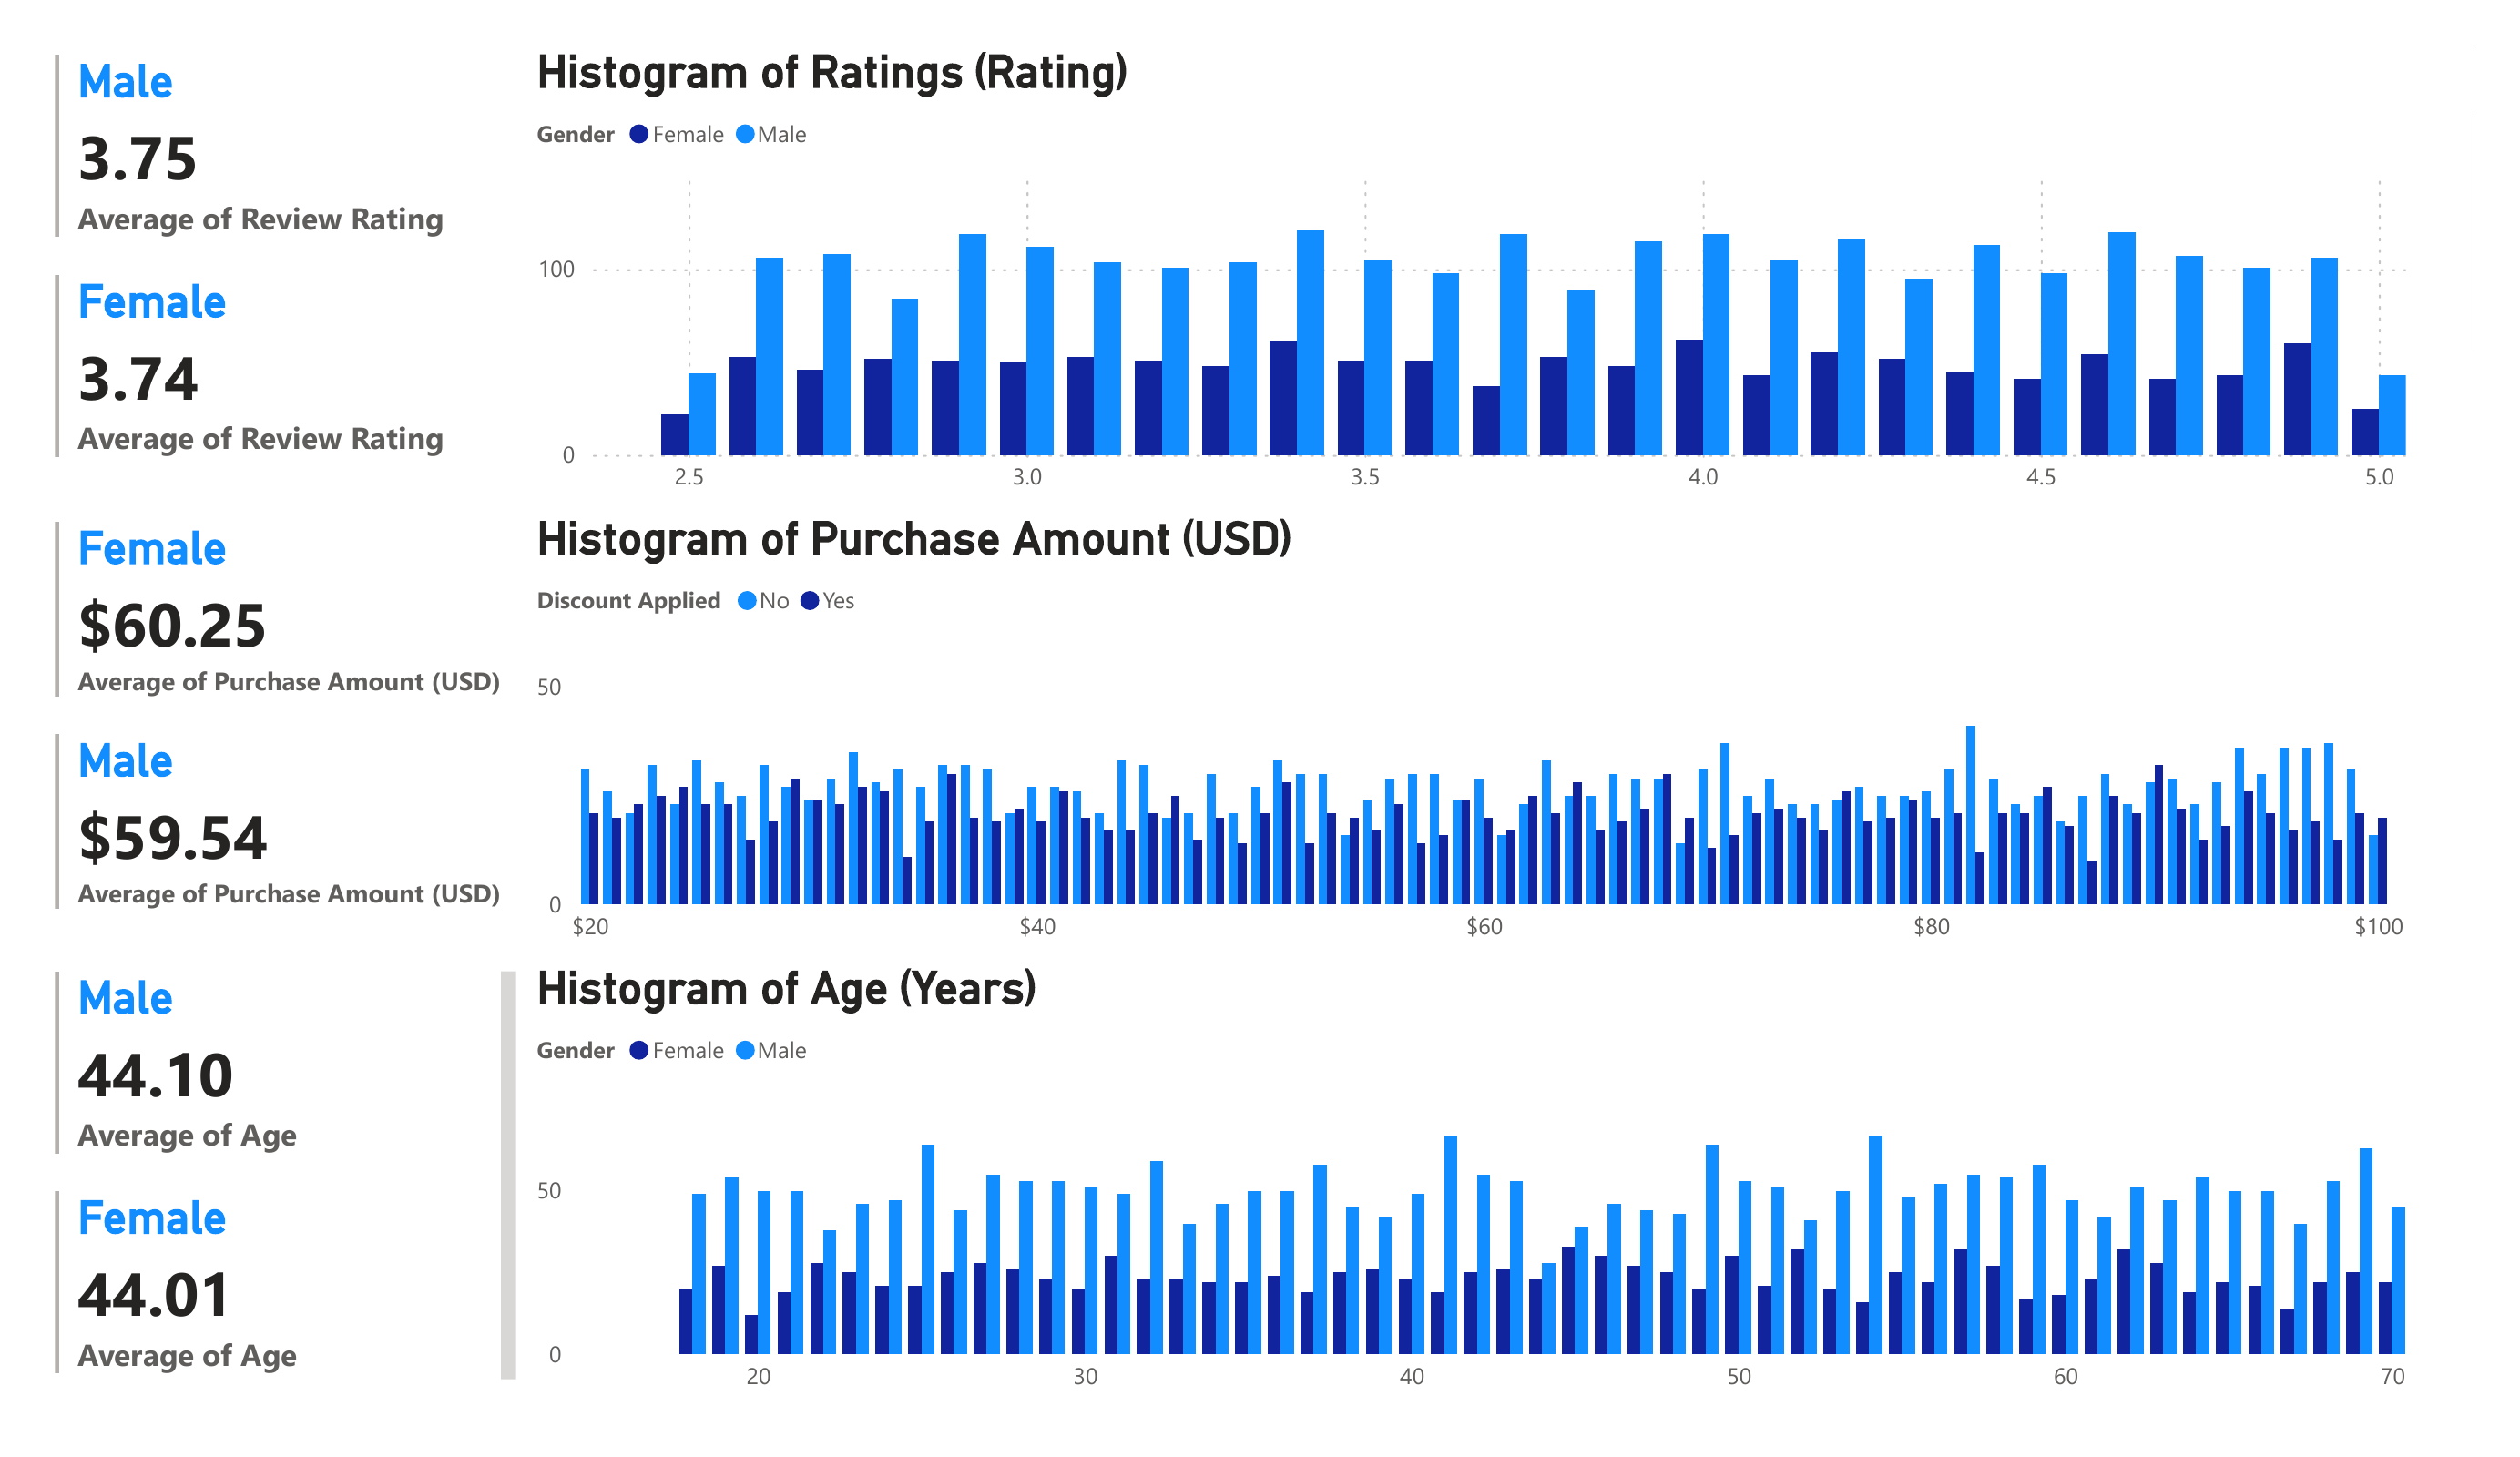

In [11]:
images[1]

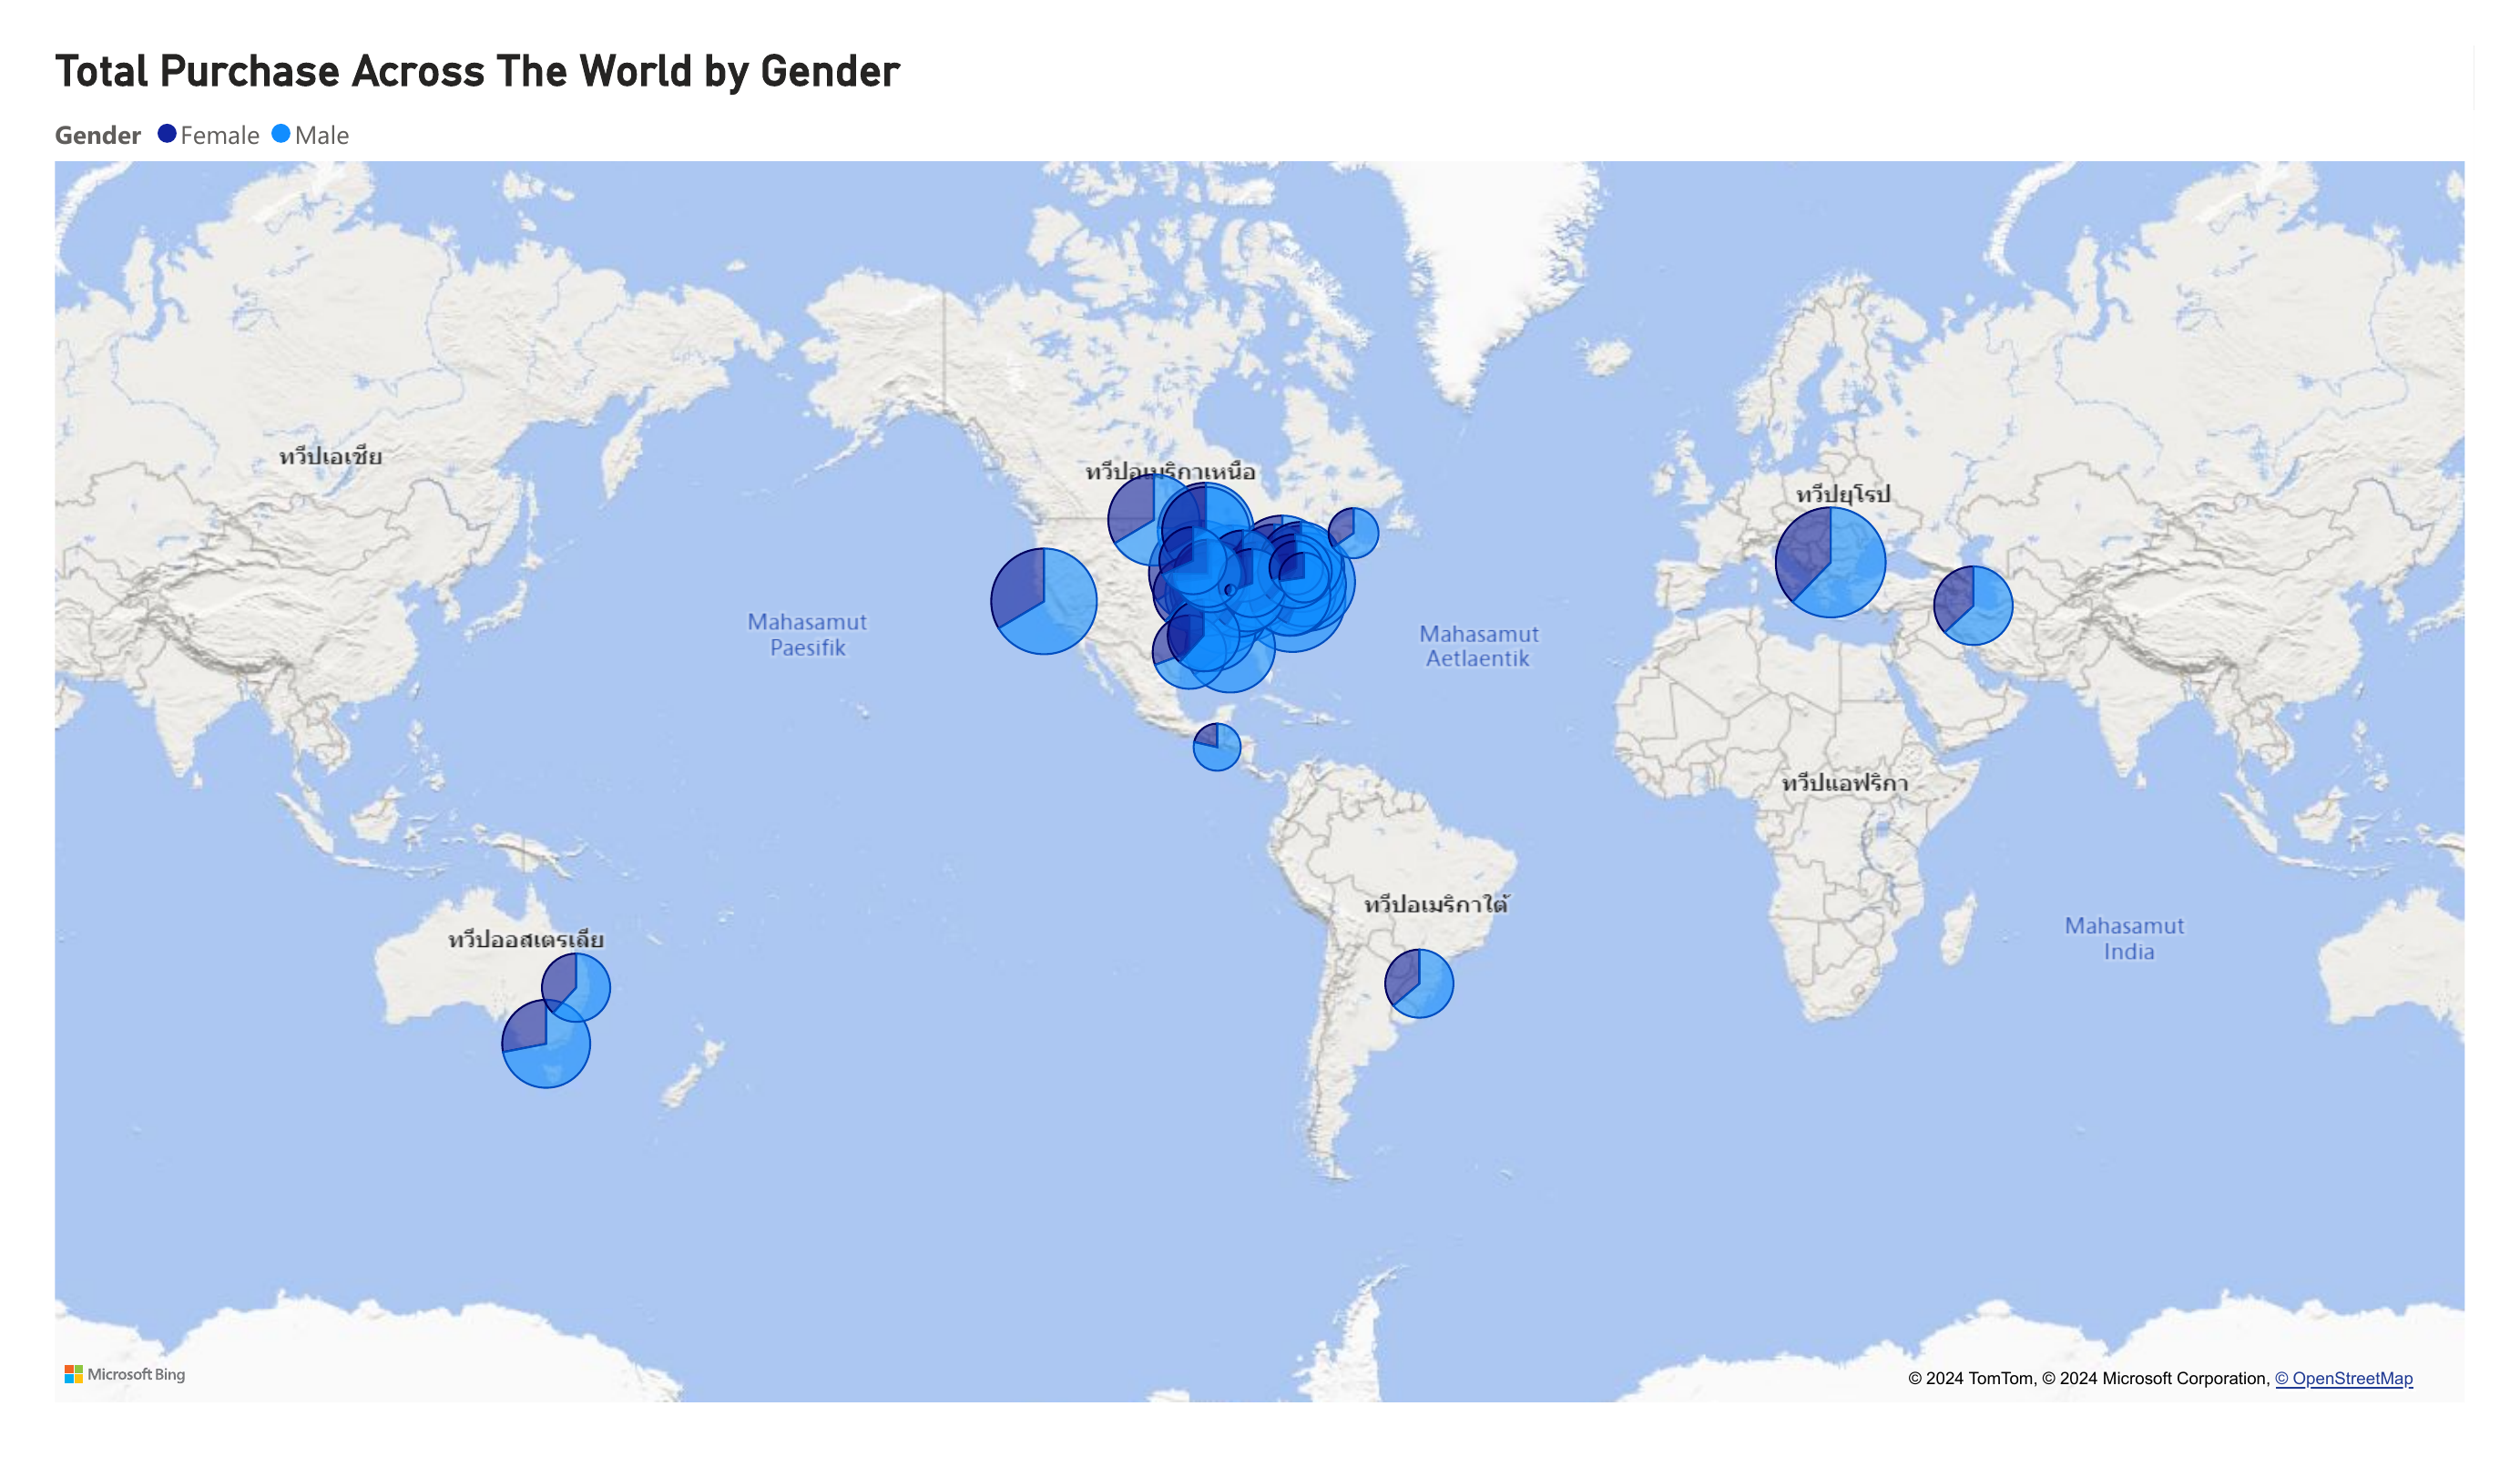

In [50]:
images[2]

**Perform statistical analysis for Rating, Purchase, and Age by gender.**

In [2]:
from scipy.stats import ttest_ind
import seaborn as sns

def plot_and_ttest_2v(df, col_cat, cat1, cat2, numeric):

  plt.grid(True)
  ax = sns.histplot(data = df, x = numeric, hue = col_cat, bins = 10, stat = 'density', alpha = 0.5)

  #label
  mean_F = df[df[col_cat] == cat1][numeric].mean()
  mean_M = df[df[col_cat] == cat2][numeric].mean()

  ax.axvline(x = mean_F, color = '#ff4400', linestyle='--')
  ax.axvline(x = mean_M, color = 'blue', linestyle='--')

  legend_labels_means = [f'Mean {cat1}: {mean_F:.2f}', f'Mean {cat2}: {mean_M:.2f}']
  ax.legend(labels = legend_labels_means)

  plt.xlabel(numeric)
  plt.show()


  #label
  t_statistic, p_value = ttest_ind(df[df[col_cat] == cat1][numeric], df[df[col_cat] == cat2][numeric])
  print(f'T - statistic: {t_statistic:.4f}')
  print(f'P - value: {p_value:.4f}')

  alpha = 0.05
  if p_value < alpha:
      print('The difference is statistically significant.')
  else:
      print('There is no significant difference.')


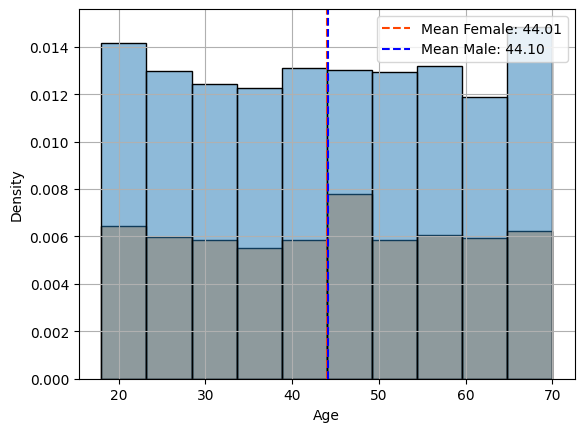

T - statistic: -0.1725
P - value: 0.8630
There is no significant difference.


In [3]:
plot_and_ttest_2v(df, 'Gender', 'Female','Male', 'Age')

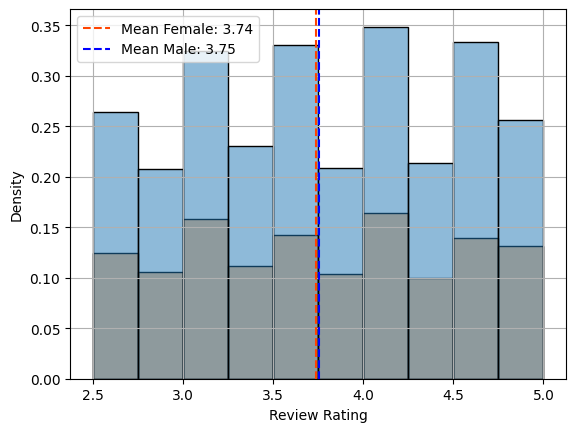

T - statistic: -0.5097
P - value: 0.6103
There is no significant difference.


In [4]:
plot_and_ttest_2v(df, 'Gender', 'Female','Male', 'Review Rating')

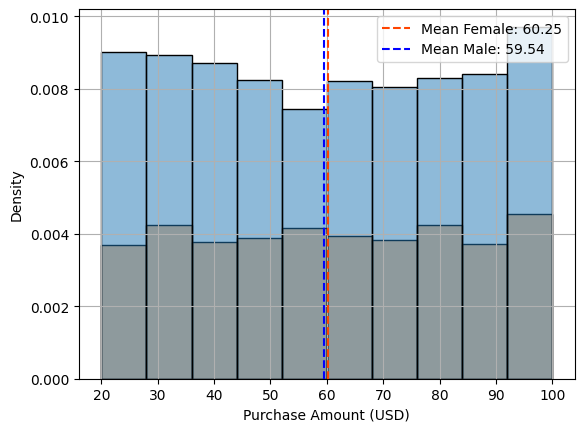

T - statistic: 0.8769
P - value: 0.3806
There is no significant difference.


In [5]:
plot_and_ttest_2v(df, 'Gender', 'Female','Male', 'Purchase Amount (USD)')

**Perform statistical analysis for Rating, Purchase Amount, and Previous Purchases by Discount Applied.**

In [22]:
df['Discount Applied'].equals(df['Promo Code Used'])

True

In [49]:
df['Discount Applied'].value_counts()

Discount Applied
No     2223
Yes    1677
Name: count, dtype: int64

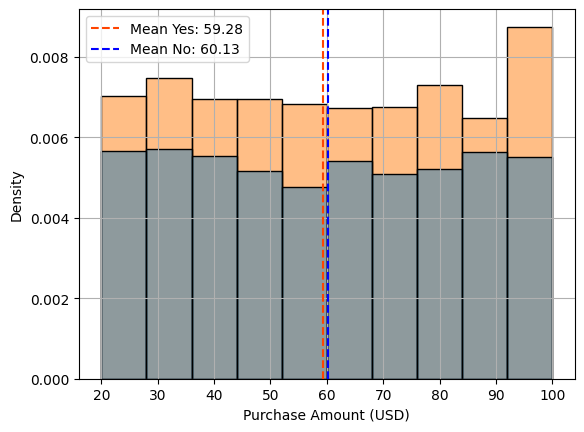

T - statistic: -1.1114
P - value: 0.2665
There is no significant difference.


In [51]:
plot_and_ttest_2v(df, 'Discount Applied', 'Yes','No', 'Purchase Amount (USD)')

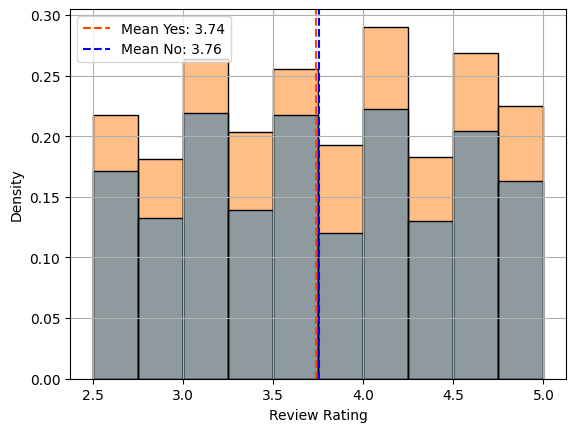

T - statistic: -0.7796
P - value: 0.4357
There is no significant difference.


In [53]:
plot_and_ttest_2v(df, 'Discount Applied', 'Yes','No', 'Review Rating')

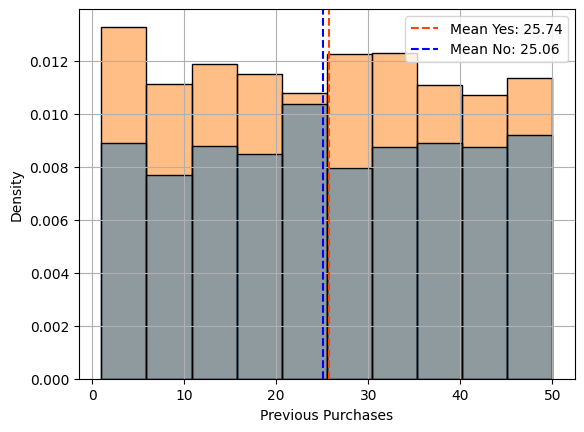

T - statistic: 1.4699
P - value: 0.1417
There is no significant difference.


In [74]:
plot_and_ttest_2v(df, 'Discount Applied', 'Yes','No', 'Previous Purchases')

**Total purchase amount for each seasons.**

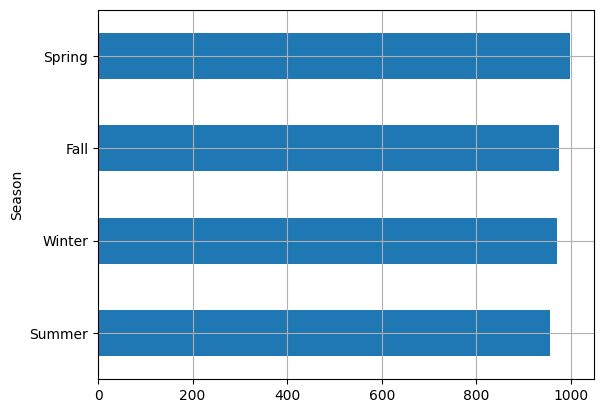

In [86]:
df['Season'].value_counts().sort_values().plot(kind ='barh', grid =True)
plt.show()

**Average purchase amount for each season.**

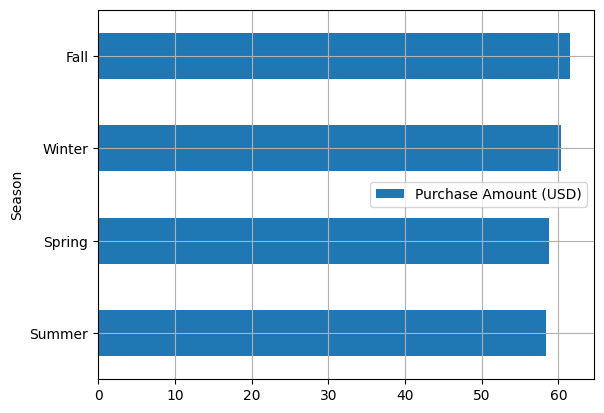

In [88]:
df[['Season', 'Purchase Amount (USD)']].groupby('Season').mean().sort_values(by = 'Purchase Amount (USD)').plot(kind = 'barh', grid =True)
plt.show()

**Is there a relationship between the purchase amount (in USD) and previous purchases?**

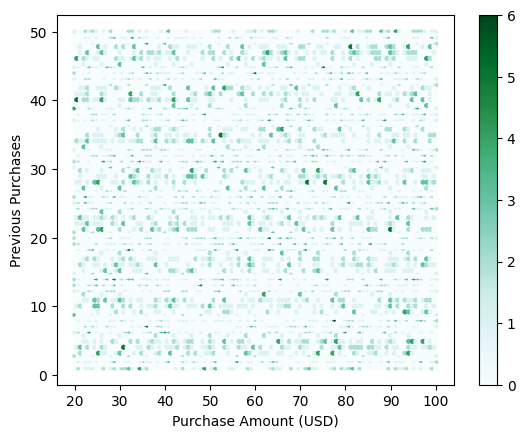

                       Purchase Amount (USD)  Previous Purchases
Purchase Amount (USD)               1.000000            0.008063
Previous Purchases                  0.008063            1.000000


In [73]:
df[['Purchase Amount (USD)', 'Previous Purchases']].plot(kind = 'hexbin', x='Purchase Amount (USD)', y='Previous Purchases')
plt.show()

print(df[['Purchase Amount (USD)', 'Previous Purchases']].corr())

**How about 'Review Rating' and 'Previous Purchases'.**

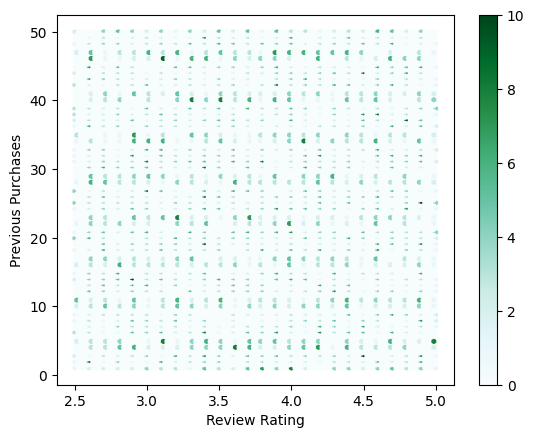

                    Review Rating  Previous Purchases
Review Rating            1.000000            0.004229
Previous Purchases       0.004229            1.000000


In [36]:
df[['Review Rating', 'Previous Purchases']].plot(kind = 'hexbin', x='Review Rating', y='Previous Purchases')
plt.show()

print(df[['Review Rating', 'Previous Purchases']].corr())